In [1]:
import matplotlib.pyplot as plt
import numpy
from reference_tools import equation_coefficients
from rayleigh_diagnostics import Point_Probes

In [9]:
def check_balance(pp, ivar, imvar, exvar):
    times = pp.time
    dt = times[2:] - times[1:-1]
    dt_old = times[1:-1] - times[:-2]

    # Compute the LHS  (df/dt)
    vshape = pp.vals.shape
    d1 = vshape[0]
    d2 = vshape[1]
    d3 = vshape[2]
    d4 = vshape[4]
    
    inte = numpy.zeros((d1,d2,d3,d4),dtype='d')
    
    inte[:,:,:,:] = pp.vals[:, :, :, pp.lut[ivar],:]
    dinte = inte[:,:,:,2:] - inte[:,:,:,1:-1]
    lhs = dinte/dt
    
    
    
    f_exp= numpy.zeros((d1,d2,d3,d4),dtype='d')
    f_imp = 0*f_exp
    
    for i in imvar:
        print('imvar: ',i)
        if (i > 0):
            f_imp += pp.vals[:,:,:,pp.lut[i],:]
        else:
            f_imp += -pp.vals[:,:,:,pp.lut[-i],:]
            
    for i in exvar:
        print('exvar: ',i)
        if (i > 0):
            f_exp += pp.vals[:,:,:,pp.lut[i],:]
        else:
            f_exp += -pp.vals[:,:,:,pp.lut[-i],:]
            

    rhs = 0.5*(f_imp[:,:,:,2:] + f_imp[:,:,:,1:-1]) + f_exp[:,:,:,1:-1] 
    rhs += 0.5*(dt/dt_old)*(f_exp[:,:,:,1:-1] - f_exp[:,:,:,:-2])
    return lhs, rhs

In [3]:
pp = Point_Probes('24901000', path='Point_Probes_low_res/')

In [10]:
i = 5 # phi
j = 2 # theta


##############################
# Heat codes
te = 701
adv_heat = -1401
cond_heating = 1421
int_heating = 1434
visc_heating = 1435
joule_heating = 1436

exvar_heat = [adv_heat, int_heating,visc_heating, joule_heating]
imvar_heat = [cond_heating]
ivar_heat = te
##############################
# Momentum codes (radial)
rhovr = 201
adv = -1201
cor = 1219
visc = 1228
press = 1237
grav = 1216
lorentz = 1248

exvar_mom = [adv,cor,lorentz]
imvar_mom = [visc,press,grav]
ivar_mom = rhovr

exvar= exvar_mom
imvar= imvar_mom
ivar = ivar_mom

lhs, rhs = check_balance(pp, ivar, imvar, exvar)


ncol = 2
nrow = pp.nr//ncol

print(ncol*nrow)
k = 0
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (10,5*nrow))
for i in range(ncol):
    for j in range(nrow):
        

        ax[j][i].plot(pp.time[2:], lhs[i,j,k,:], 'k', label='d [INTE] /dt (numderiv)')
        ax[j][i].plot(pp.time[2:], rhs[i,j,k,:], 'r--', label='weighted RHS')
        ax[j][i].set_title('Radius = '+str(pp.radius[k]))
        k += 1
plt.show()

IndexError: index 4000 is out of bounds for axis 3 with size 7

18


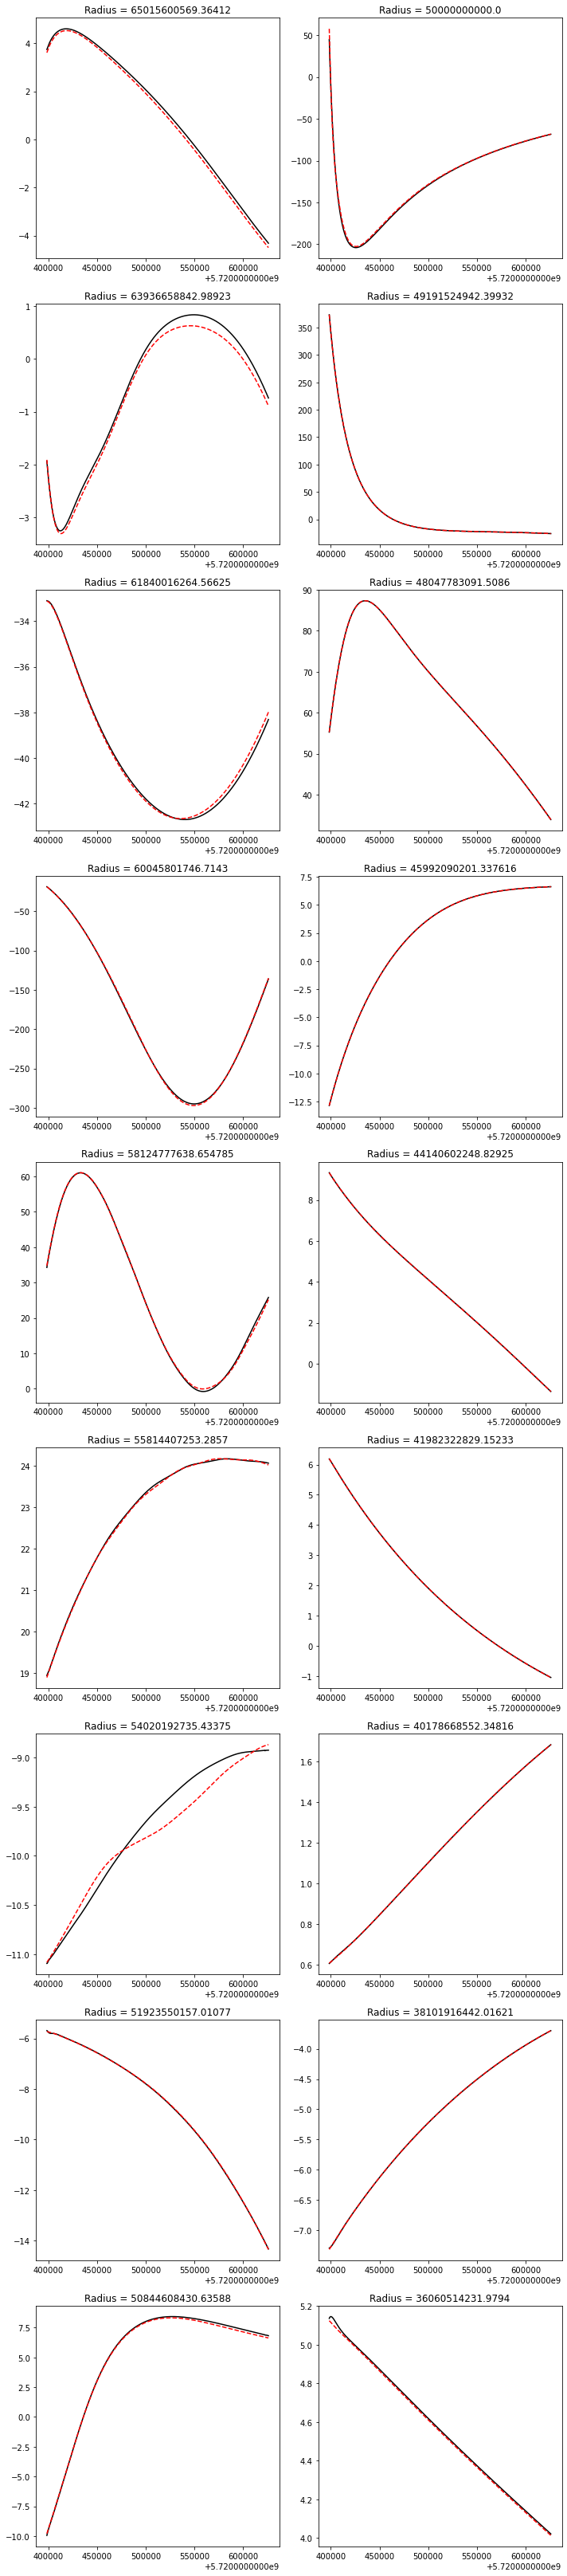

In [7]:
pp2 = Point_Probes('24901000', path='Point_Probes_high_res/')


    
lhs, rhs = check_balance(pp2, te, imvar, exvar)


ncol = 2
nrow = pp2.nr//ncol

print(ncol*nrow)
k = 0
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (10,5*nrow))
for i in range(ncol):
    for j in range(nrow):
        

        ax[j][i].plot(pp2.time[2:], lhs[i,j,k,:], 'k', label='d [INTE] /dt (numderiv)')
        ax[j][i].plot(pp2.time[2:], rhs[i,j,k,:], 'r--', label='weighted RHS')
        ax[j][i].set_title('Radius = '+str(pp2.radius[k]))
        k += 1
plt.tight_layout()
plt.show()

In [ ]:
#point_probe_values = 501, 701, 1401, 1421, 1434, 1435, 1436
#point_probe_frequency = 1
#point_probe_nrec = 1000
#point_probe_r_nrm = 0.025, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.475, 0.5, 0.525, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 0.975
#point_probe_theta_nrm = 0.05, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 0.95
#point_probe_phi_nrm = 0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875
